In [136]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('brain_size.csv', sep=';', na_values=".")

In [113]:
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [11]:
gender = df.groupby(df['Gender'])

In [114]:
males = df[df['Gender'] == 'Male']

In [115]:
males

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466
11,12,Male,141,150,128,151.0,70.0,1079549
12,13,Male,135,129,124,155.0,69.0,924059
17,18,Male,100,96,102,178.0,73.5,945088
19,20,Male,80,77,86,180.0,70.0,889083
20,21,Male,83,83,86,NaN,NaN,892420


In [116]:
avg1 = males['VIQ'].sum()/len(males)

In [117]:
avg1
females = df[df['Gender'] == 'Female']
avg2 = females['VIQ'].sum()/len(females)

In [118]:
# doing t test
data1 = males['VIQ']
data1
data2 = females['VIQ']

In [119]:
# males = 115.25
# females = 109.45
avg1
avg2

109.45

In [120]:
import scipy
sta, p = scipy.stats.ttest_ind(data1, data2)

In [121]:
sta

0.7726161723275011

In [122]:
p  # greater than 0.05, so we say the population averages are the same for male and female VIQ

0.44452876778583217

In [123]:
print(scipy.stats.ttest_ind(data1, data2))

Ttest_indResult(statistic=0.7726161723275011, pvalue=0.44452876778583217)


In [124]:
df.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [125]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
for col in df:
    # take the avg
    for gender in range(2):
        s, p = scipy.stats.ttest_ind(males[col], females[col])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [129]:
df.drop(columns=['MRI_Count'])

,Gender,FSIQ,VIQ,PIQ,Weight,Height
0,Female,133,132,124,118.0,64.5
1,Male,140,150,124,NaN,72.5
2,Male,139,123,150,143.0,73.3
3,Male,133,129,128,172.0,68.8
4,Female,137,132,134,147.0,65.0
5,Female,99,90,110,146.0,69.0
6,Female,138,136,131,138.0,64.5
7,Female,92,90,98,175.0,66.0
8,Male,89,93,84,134.0,66.3
9,Male,133,114,147,172.0,68.8


In [131]:
for col in df.columns:
    if col != 'Gender':
        print(col)
        for value in df['Gender'].values:
            males = df.groupby(value)[col]
            

FSIQ


KeyError: 'Female'

In [134]:
def get_by_gender(sample_df, col):
    return df.loc[df['Gender'] == "Male", col], df.loc[df['Gender'] == 'Female', col]

def test_each(df, sig_lvl=0.05):
    for col in df[1:-1]:
        _, p = scipy.stats.ttest_ind(get_by_gender(df, col)[0], get_by_gender(df, col)[1])
        print(p)
test_each(df)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [139]:
for cat in df.columns[2:-1]:
    ls = []
    for gender in df['Gender'].unique():
        ls.append(df[df['Gender'] == gender][cat].dropna().values)
        print(ls)
        sta, p = scipy.stats.ttest_ind(ls[0], ls[1])
        if p > 0.05:
            print('same')
        else:
            print('different')

[array([133, 137,  99, 138,  92, 132, 140,  96,  83, 132, 101, 135,  91,
        85,  77, 130, 133,  83, 133,  88])]


IndexError: list index out of range

In [144]:
# Iris dataset:
# 3 types of plants, 150 samples 
# each sample has 4 properties

data = pd.read_csv('Datasets/Iris.csv')

In [151]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [152]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [153]:
len(data.columns) - 2

4

In [154]:
# get std dev of setosa, for sepal length
setosa = data[data['Species'] == 'Iris-setosa']

In [155]:
setosa.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


In [160]:
# setosa sepal length std dev is 0.35249, mean is 5.00600
# there are 50 samples of each plant. N = 50

In [172]:
import numpy as np
# setosa sepal length 
z = scipy.stats.norm.ppf(1-0.025)
lower = 5.01 - (z)*(1-(.05/2)*(.3525/np.sqrt(50)))
upper = 5.01 + (z)*(1-(.05/2)*(.3525/np.sqrt(50)))

In [173]:
lower

3.052478670950362

In [174]:
upper

6.967521329049637

In [180]:
def confidence_interval_z_test(data, significance_lvl, sigma):
    z = scipy.stats.norm.ppf(1-significance_lvl/2)
    L = np.mean(data) - z*sigma/np.sqrt(len(data))
    U = np.mean(data) + z*sigma/np.sqrt(len(data))
    return L,U
    
def confidence_interval_t_test(data, significance_lvl):
    z = scipy.stats.t.ppf(1-significance_lvl/2, len(data) - 1)
    L = np.mean(data) - t * np.std(data, ddof=1) / np.sqrt(len(data))
    U = np.mean(data) + t * np.std(data, ddof=1) / np.sqrt(len(data))
    return L,U
x = data[data['Species'] == 'Iris-setosa']['SepalLengthCm']
print(confidence_interval_z_test(x, 0.05, 0.3525))
print(confidence_interval_t_test(x, 0.05))

(4.908293780383348, 5.103706219616653)


NameError: name 't' is not defined

In [187]:
def remove_outliers(x):
    '''Assumes normal distribution'''
    avg = x.mean()
    s = x.std()
    too_low = avg - (3*s)
    too_high = avg + (3*s)
    '''
    for val in x:
        if val > too_high or val <= too_low:
            x.drop(val)
    '''
    outliers = [val for val in x if val < too_high or val >= too_low]
    print(x)
    
remove_outliers(setosa['SepalWidthCm'])

0     3.5
1     3.0
2     3.2
3     3.1
4     3.6
5     3.9
6     3.4
7     3.4
8     2.9
9     3.1
10    3.7
11    3.4
12    3.0
13    3.0
14    4.0
15    4.4
16    3.9
17    3.5
18    3.8
19    3.8
20    3.4
21    3.7
22    3.6
23    3.3
24    3.4
25    3.0
26    3.4
27    3.5
28    3.4
29    3.2
30    3.1
31    3.4
32    4.1
33    4.2
34    3.1
35    3.2
36    3.5
37    3.1
38    3.0
39    3.4
40    3.5
41    2.3
42    3.2
43    3.5
44    3.8
45    3.0
46    3.8
47    3.2
48    3.7
49    3.3
Name: SepalWidthCm, dtype: float64


In [191]:
def remove_outliers_not_norm(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    print(iqr)
    outliers = [val for val in x if val < (q1 - (1.5*iqr)) or val > (q1 + (1.5*iqr))]
    return outliers
    
remove_outliers_not_norm(setosa['SepalWidthCm'])

# using scipy
print(scipy.stats.iqr(setosa['SepalWidthCm']))

0.5500000000000003
0.5500000000000003


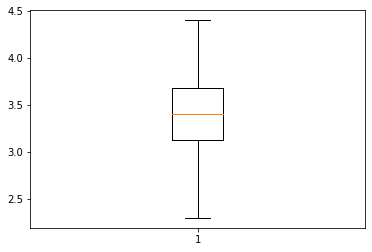

In [192]:
# visually see the outlier, using box plot
import matplotlib.pyplot as plt
plt.boxplot(setosa['SepalWidthCm'])
plt.show()